In [ ]:
# CALCULATE ITR
import math

accuracy = 0.9273  
num_classes = 2
signal_duration = 2.0  # seconds
processing_time = 0.651  # seconds

trial_time = signal_duration + processing_time  # seconds
trial_time_minutes = trial_time / 60.0

# Calculate the ITR (Information Transfer Rate)
# Formula: ITR = log2(N) + P * log2(P) + (1-P) * log2((1-P)/(N-1)) bits/trial
# Where N is the number of classes and P is the accuracy


bits_per_trial = math.log2(num_classes) + accuracy * math.log2(accuracy) + (1 - accuracy) * math.log2((1 - accuracy) / (num_classes - 1))
itr_bpm = bits_per_trial / trial_time_minutes

print(f"The ITR value is: {itr_bpm:.2f} bits/minute") # The ITR value is: 14.12 bits/minute
print(f"The ITR value is: {bits_per_trial:.2f} bits/trial")

In [ ]:
# unisci i file relax in un unico file npy
'''
import numpy as np
import os

input_dir = "D:\\Student_Projects\\Thesis Gioele\\Raw_data\\sub-Gio\\ses-S002\\npy"
output_file = "D:\\Student_Projects\\Thesis Gioele\\Raw_data\\sub-Gio\\ses-S002\\npy\\all_relax.npy"

all_data = []

try:
    # Ottieni la lista di tutti i file .npy nella cartella
    npy_files = [f for f in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, f)) and f.endswith(".npy")]

    if npy_files:
        print(f"Trovati {len(npy_files)} file .npy nella cartella '{input_dir}':")
        for npy_file in npy_files:
            file_path = os.path.join(input_dir, npy_file)
            try:
                # Carica il file .npy
                data = np.load(file_path)
                print(f"- Caricato file: '{npy_file}' con shape: {data.shape}")

                # Verifica che i dati abbiano la forma prevista (num_samples, num_channels)
                if data.ndim == 2:
                    all_data.append(data)
                else:
                    print(f"  ** Avviso: Il file '{npy_file}' non ha la forma (num_samples, num_channels). Ignorato.")

            except Exception as e:
                print(f"  ** Errore durante il caricamento di '{npy_file}': {e}")

        if all_data:
            # Unisci tutti gli array lungo la dimensione dei campioni (axis=0)
            merged_array = np.concatenate(all_data, axis=0)
            np.save(output_file, merged_array)
            print(f"\nUniti tutti i dati in: '{output_file}' con shape: {merged_array.shape}")
        else:
            print("\nNessun file .npy valido trovato per l'unione.")

    else:
        print(f"Non sono stati trovati file .npy nella cartella '{input_dir}'.")

except FileNotFoundError:
    print(f"Errore: La cartella '{input_dir}' non è stata trovata.")
except Exception as e:
    print(f"Si è verificato un errore generale: {e}")'''

In [ ]:
# salva il file come .npy da .xdf
'''
import os
import pyxdf
import numpy as np

input_dir = "D:\\Student_Projects\\Thesis Gioele\\Raw_data\\sub-Gio\\ses-S004\\xdf\\"
output_dir = "D:\\Student_Projects\\Thesis Gioele\\Raw_data\\sub-Gio\\ses-S004\\npy\\"

try:
    # Assicurati che la cartella di output esista, altrimenti creala
    os.makedirs(output_dir, exist_ok=True)

    # Ottieni la lista di tutti gli elementi nella cartella di input
    elementi = os.listdir(input_dir)

    # Filtra solo i file .xdf
    xdf_files = [elemento for elemento in elementi if os.path.isfile(os.path.join(input_dir, elemento)) and elemento.endswith(".xdf")]

    if xdf_files:
        print(f"Trovati {len(xdf_files)} file .xdf nella cartella '{input_dir}':")
        for xdf_file in xdf_files:
            input_path = os.path.join(input_dir, xdf_file)
            output_filename = os.path.splitext(xdf_file)[0] + ".npy"
            output_path = os.path.join(output_dir, output_filename)

            try:
                # Carica il file .xdf
                data, header = pyxdf.load_xdf(input_path)

                # Trova il flusso di dati EEG
                eeg_data = None
                for stream in data:
                    if stream['info']['type'][0] == 'EEG':
                        eeg_data = stream['time_series']
                        break

                if eeg_data is not None:
                    # Salva i dati EEG come file .npy
                    np.save(output_path, eeg_data)
                    print(f"- Convertito: '{xdf_file}' -> '{output_filename}'")
                else:
                    print(f"- Nessun flusso EEG trovato in: '{xdf_file}'")

            except Exception as e:
                print(f"- Errore durante la conversione di '{xdf_file}': {e}")

    else:
        print(f"Non sono stati trovati file .xdf nella cartella '{input_dir}'.")

except FileNotFoundError:
    print(f"Errore: La cartella '{input_dir}' non è stata trovata.")
except Exception as e:
    print(f"Si è verificato un errore generale: {e}")'''

In [ ]:
# salva solo gli ultimi 750 secondi
'''
import numpy as np
import os

file_path = "D:\\Student_Projects\\Thesis Gioele\\Raw_data\\sub-Gio\\ses-S004\\npy\\sub-gio_ses-S004_task-Default_run-001_eeg.npy"
sampling_rate_hz = 125
seconds_to_keep = 750
additional_samples = 5515
total_samples_to_keep = int(seconds_to_keep * sampling_rate_hz) + additional_samples

try:
    # Carica il file .npy
    eeg_data = np.load(file_path)
    #print(eeg_data.shape) #(97105, 16) 

    # Calcola il numero totale di campioni nel file
    num_samples = eeg_data.shape[0]

    if num_samples >= total_samples_to_keep:
        # Se ci sono abbastanza campioni, prendi gli ultimi 'total_samples_to_keep'
        new_eeg_data = eeg_data[..., -total_samples_to_keep:]
        # Sovrascrivi il file con i dati ridotti
        np.save(file_path, new_eeg_data)
        print(f"Il file '{file_path}' è stato sovrascritto mantenendo gli ultimi {total_samples_to_keep} campioni.")
    else:
        print(f"Il file '{file_path}' contiene solo {num_samples} campioni, meno dei {total_samples_to_keep} richiesti. Il file non è stato modificato.")

except FileNotFoundError:
    print(f"Errore: Il file '{file_path}' non è stato trovato.")
except Exception as e:
    print(f"Si è verificato un errore durante l'elaborazione del file: {e}")'''

In [ ]:
# Merge the files from a directory into a single file
'''import os
import numpy as np

def merge_npy_files(input_dir, output_file='merged.npy'):
    """
    Loads all .npy files in the specified directory and merges them along the first axis.
    Assumes all arrays have shape (timeframes, channels) and the same number of channels.

    Parameters:
    - input_dir: str, path to the directory containing .npy files.
    - output_file: str, filename for the merged output array.

    Returns:
    - merged_array: numpy.ndarray, the concatenated array along the timeframes dimension.
    """
    # List all .npy files in the directory
    npy_files = [f for f in os.listdir(input_dir) if f.endswith('.npy')]
    if not npy_files:
        raise FileNotFoundError(f"No .npy files found in {input_dir}")

    # Sort files to ensure consistent ordering
    npy_files.sort()

    # Load and store arrays
    arrays = []
    for file in npy_files:
        file_path = os.path.join(input_dir, file)
        data = np.load(file_path)
        arrays.append(data)
        print(f"Loaded {file} with shape {data.shape}")

    # Check channel consistency
    _, n_channels = arrays[0].shape
    for arr in arrays:
        if arr.shape[1] != n_channels:
            raise ValueError("All files must have the same number of channels")

    # Concatenate along the timeframes axis (axis=0)
    merged_array = np.concatenate(arrays, axis=0)
    print(f"Merged array shape: {merged_array.shape}")

    # Save merged array
    np.save(output_file, merged_array)
    print(f"Saved merged array to {output_file}")

    return merged_array


if __name__ == '__main__':
    # Example usage
    input_directory = 'D:\Student_Projects\Thesis Gioele\Raw_data\sub-Gio\ses-S002\\npy'
    output_filename = 'D:\Student_Projects\Thesis Gioele\Raw_data\sub-Gio\ses-S002\\npy\\all_relax.npy'
    merge_npy_files(input_directory, output_filename)'''


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.decomposition import FastICA
import pywt

# File paths
'''stroop_path_1 = "D:\Student_Projects\Thesis Gioele\Raw_data\sub-Gio\ses-S003\\npy_stress\\all_stroop.npy"

# Load the arrays
eeg = np.load(stroop_path_1)'''
import os
import glob
import pandas as pd 

# Data loading
path = "D:\\Student_Projects\\Thesis Gioele\\00_04_RAW EEG STRESS DATASET"
relax_files = glob.glob(os.path.join(path, "Relax", "*.csv"))

# loading CSV files into a list of DataFrames
def load_csv_files(file_list):
    data_list = []
    for file in file_list:
        df = pd.read_csv(file) 
        df = df.drop(df.columns[0], axis=1) # Remove the first column (index of timeframes)
        data_list.append(df)
    return data_list

relax_data = load_csv_files(relax_files)
eeg = relax_data[0].to_numpy()

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

def apply_ica(data, n_components=None, random_state=0):
    ica = FastICA(n_components=n_components, random_state=random_state)
    sources = ica.fit_transform(data)
    return ica, sources

def wavelet_thresholding(sources, wavelet='coif5', level=None):
    """
    Apply stationary wavelet thresholding to ICA sources.
    Returns thresholded sources of same shape.
    """
    n_samples, n_components = sources.shape
    cleaned = np.zeros_like(sources)

    for comp in range(n_components):
        coeffs = pywt.wavedec(sources[:, comp], wavelet, mode='symmetric', level=level)
        # detail coeffs at all levels
        detail_coeffs = coeffs[1:]
        # compute universal threshold
        # concatenate detail coeff arrays
        d = np.concatenate(detail_coeffs)
        sigma = np.median(np.abs(d)) / 0.6745
        uthresh = sigma * np.sqrt(2 * np.log(len(d)))
        # soft threshold detail coeffs
        new_coeffs = [coeffs[0]]
        for detail in detail_coeffs:
            new_coeffs.append(pywt.threshold(detail, uthresh, mode='soft'))
        # reconstruct
        cleaned[:, comp] = pywt.waverec(new_coeffs, wavelet, mode='symmetric')[:n_samples]
    return cleaned

def w_ica_artifact_removal(eeg_data, fs, lowcut=1.0, highcut=40.0,
                           n_components=None, random_state=0):
    """
    Perform Wavelet-enhanced ICA (W-ICA) artifact removal:
      1. Bandpass filter
      2. ICA decomposition (Infomax/extended if available)
      3. Wavelet thresholding on all ICA sources
      4. Reconstruct cleaned data from thresholded sources
    Returns:
      cleaned_data: EEG reconstructed after W-ICA
      ica: fitted ICA object
      sources: original ICA sources
      cleaned_sources: thresholded sources
    """
    # 1. Filter each channel
    filtered = np.apply_along_axis(bandpass_filter, 0, eeg_data, lowcut, highcut, fs)
    # 2. Initial ICA
    ica, sources = apply_ica(filtered, n_components=n_components, random_state=random_state)
    # 3. Wavelet thresholding on sources
    cleaned_sources = wavelet_thresholding(sources)
    # 4. Reconstruct EEG from cleaned sources
    cleaned_data = ica.inverse_transform(cleaned_sources)
    return cleaned_data, ica, sources, cleaned_sources

fs = 125
cleaned, ica_model, original_src, wica_src = w_ica_artifact_removal(eeg, fs)

In [ ]:
# Plotting a signal before and after (filtering/ICA/...)
'''from scipy.signal import welch

def plot_before_after(eeg_data, cleaned_data, fs, channel=0, duration=None):
    """
    Plot original and cleaned EEG signal for a single channel.

    Parameters:
      eeg_data: array, shape (n_samples, n_channels)
      cleaned_data: array, same shape as eeg_data
      fs: sampling rate in Hz
      channel: channel index to plot
      duration: duration in seconds to plot (default: full signal)
    """
    n_samples = eeg_data.shape[0]
    times = np.arange(n_samples) / fs
    if duration is not None:
        max_samples = int(duration * fs)
        times = times[:max_samples]
        orig = eeg_data[:max_samples, channel]
        clean = cleaned_data[:max_samples, channel]
    else:
        orig = eeg_data[:, channel]
        clean = cleaned_data[:, channel]

    plt.figure(figsize=(10, 4))
    plt.plot(times, orig, label='Original', alpha=0.7)
    plt.plot(times, clean, label='W-ICA Cleaned', alpha=0.7)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Channel {channel} Before and After W-ICA')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_before_after(eeg, cleaned, fs, channel=0, duration=5)

def plot_psd_before_after(eeg_data, cleaned_data, fs, channel=0, nperseg=None):
    """
    Plot Power Spectral Density (PSD) of original and cleaned EEG for a single channel.

    Parameters:
      eeg_data: array, shape (n_samples, n_channels)
      cleaned_data: array, same shape as eeg_data
      fs: sampling rate in Hz
      channel: channel index to plot
      nperseg: length of each segment for Welch's method
    """
    orig = eeg_data[:, channel]
    clean = cleaned_data[:, channel]
    # Compute PSD using Welch's method
    f_orig, Pxx_orig = welch(orig, fs=fs, nperseg=nperseg)
    f_clean, Pxx_clean = welch(clean, fs=fs, nperseg=nperseg)

    plt.figure(figsize=(10, 4))
    plt.semilogy(f_orig, Pxx_orig, label='Original PSD', alpha=0.7)
    plt.semilogy(f_clean, Pxx_clean, label='W-ICA Cleaned PSD', alpha=0.7)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density')
    plt.title(f'Channel {channel} PSD Before and After W-ICA')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_psd_before_after(eeg, cleaned, fs, channel=0, nperseg=fs*10)'''

In [2]:
# %%
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pandas as pd
from scipy.signal import butter, filtfilt, iirnotch, welch, find_peaks
from scipy.stats import kurtosis
from sklearn.decomposition import FastICA

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# %%
# DATA LOADING
'''
folder_path = "D:\\Student_Projects\\Thesis Gioele\\Codes\\Data\\01\\01_"
end_path = "_ica_v0.npy"

# Load the filtered data
relax_data_ica = np.load(folder_path + "relax" + end_path, allow_pickle=True)'''
path = "D:\\Student_Projects\\Thesis Gioele\\00_04_RAW EEG STRESS DATASET"
relax_files = glob.glob(os.path.join(path, "Relax", "*.csv"))

# loading CSV files into a list of DataFrames
def load_csv_files(file_list):
    data_list = []
    for file in file_list:
        df = pd.read_csv(file) 
        df = df.drop(df.columns[0], axis=1) # Remove the first column (index of timeframes)
        data_list.append(df.values)
    return data_list

relax_data = load_csv_files(relax_files)


Inizio pulizia ICA su 15 segmenti...


c:\ProgramData\anaconda3\envs\environmentGio\lib\site-packages\sklearn\decomposition\_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Pulizia ICA completata.


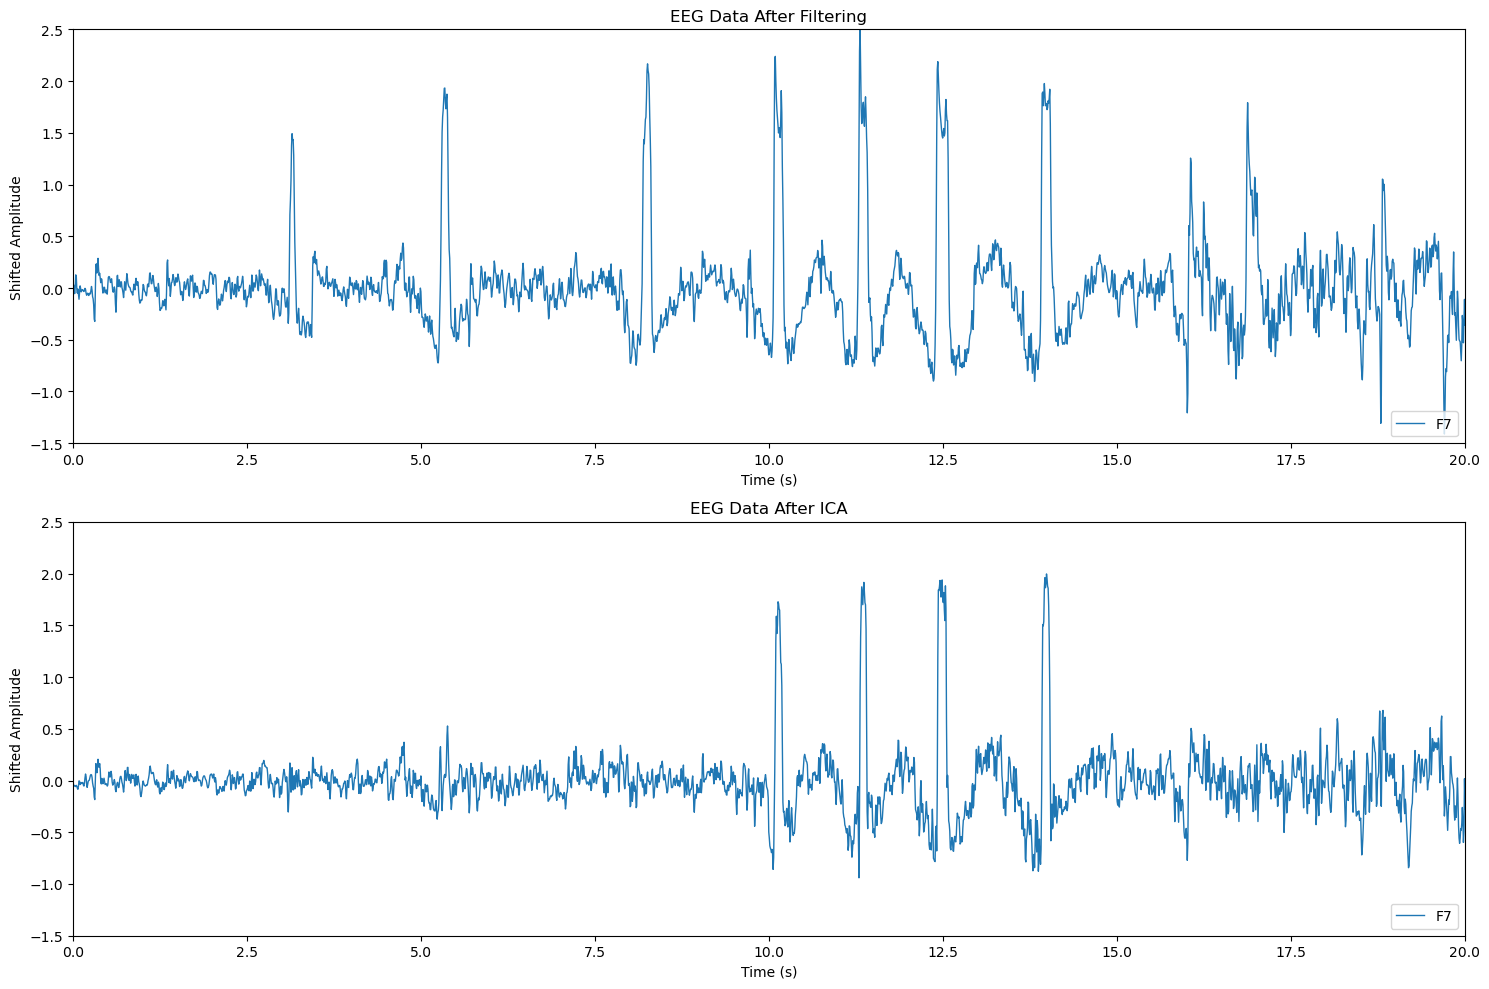

In [3]:
fs = 128
sub_idx = 3 # 4, 5, 9, 14, 18, 23 
relax = relax_data[sub_idx]

def z_normalization(data_list):
    for i in range(len(data_list)): 
        data_list[i] = (data_list[i] - data_list[i].mean()) / np.std(data_list[i]) # subtract avg, divide by std
    return data_list
# 
def bandpass_filter(data, lowcut=1, highcut=40, fs=128, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data, axis=0)

def notch_filter(data, fs=128, freq=50, quality_factor=30): 
    b, a = iirnotch(freq, quality_factor, fs)
    return filtfilt(b, a, data, axis=0)

def preprocess_data(data): # passband + notch filter
    return notch_filter(bandpass_filter(data, lowcut=1, highcut=40, fs=fs), fs=fs)

norm = z_normalization(relax)
filtered = preprocess_data(norm)

def clean_signal_ica(raw_data: np.ndarray,
                     fs: float,  # Hz
                     segment_duration: float = 2.0,  # s
                     psd_freq_thresh: float = 40.0,  # Hz (unused in current artifact criteria but kept for completeness)
                     psd_power_ratio_thresh: float = 0.5, # (unused in current artifact criteria but kept for completeness)
                     blink_cutoff: float = 4.0,  # Hz (unused in current artifact criteria but kept for completeness)
                     lf_power_ratio_thresh: float = 0.5, # (unused in current artifact criteria but kept for completeness)
                     peak_rate_min: float = 0.25,  # Hz = 1 blink every 4 seconds (unused in current artifact criteria but kept for completeness)
                     peak_rate_max: float = 2,  # Hz = 2 blinks per second
                     kurtosis_thresh: float = 12.0,
                     ica_n_components: int = None,
                     ica_max_iter: int = 200) -> np.ndarray: # Aggiunto parametro per max_iter
    """
    Perform ICA-based cleanup of multi-channel signal with multiple artifact criteria.
    Processes all segments of the signal.

    Input shape must be (timeframes x channels). If the input shape is (channels x timeframes),
    it is automatically transposed.
    """
    transposed = False
    if raw_data.shape[0] < raw_data.shape[1]:  # assume (channels x timeframes)
        raw_data = raw_data.T
        transposed = True

    n_samples, n_channels = raw_data.shape

    if ica_n_components is None:
        ica_n_components = n_channels

    samples_per_segment = int(segment_duration * fs)
    n_segments = int(np.ceil(n_samples / samples_per_segment))
    cleaned = np.zeros_like(raw_data, dtype=np.float64) # Assicurati che l'array sia float per evitare problemi

    print(f"Inizio pulizia ICA su {n_segments} segmenti...")

    for seg_idx in range(n_segments):
        start = seg_idx * samples_per_segment
        end = min(start + samples_per_segment, n_samples)
        segment = raw_data[start:end, :].T  # shape (channels, segment_length)

        # Assicurati che il segmento non sia vuoto
        if segment.shape[1] == 0:
            continue

        # ICA decomposition
        # Aggiunto max_iter all'istanza di FastICA
        ica = FastICA(n_components=ica_n_components, random_state=0, max_iter=ica_max_iter)

        try:
            sources = ica.fit_transform(segment.T).T  # (n_components, n_time)

            # Verifica se l'ICA ha raggiunto il numero massimo di iterazioni senza convergere
            if False: #ica.n_iter_ == ica.max_iter:
                print(f"Segmento {seg_idx}/{n_segments-1}: Attenzione: ICA non ha convergito entro {ica.max_iter} iterazioni. Il segmento originale verrà mantenuto.")
                # Se non converge, manteniamo il segmento originale
                cleaned[start:end, :] = segment.T
            else:
                # print(f"Segmento {seg_idx}/{n_segments-1}: ICA è convergita in {ica.n_iter_} iterazioni.")
                # collect dropped components and their criteria
                drops = []  # list of (component_idx, criterion, kurtosis)

                for ic in range(sources.shape[0]):
                    src = sources[ic]
                    # Assicurati che src non sia vuoto o abbia lunghezza sufficiente per welch
                    if len(src) < fs * 2: # welch nperseg default is 256, but here it's fs*2. Ensure src is long enough.
                        # print(f"Segmento {seg_idx}, IC {ic}: Sorgente troppo corta per analisi PSD. Saltando criteri basati su PSD/picchi.")
                        continue

                    f, Pxx = welch(src, fs=fs, nperseg=min(len(src), int(fs * 2))) # Use min to prevent nperseg > len(src)
                    total_power = Pxx.sum()

                    # 1) HF-power artifact (commentato nel codice originale)
                    '''hf_power = Pxx[f >= psd_freq_thresh].sum()
                    if hf_power / total_power > psd_power_ratio_thresh:
                        drops.append((ic, 'HF power', None))
                        continue'''

                    # 3) Mid-band peak-rate (optional criteria)
                    nyq = 0.5 * fs
                    # Controlla che psd_freq_thresh sia minore di nyq per evitare problemi con butter
                    if psd_freq_thresh >= nyq:
                        # print(f"Segmento {seg_idx}, IC {ic}: psd_freq_thresh ({psd_freq_thresh}) è >= Nyquist ({nyq}). Saltando filtro passa-basso.")
                        # Se la frequenza di taglio è troppo alta, salta l'analisi del picco
                        rate = 0 # Valore di default per rate
                    else:
                        #b, a = butter(4, psd_freq_thresh / nyq, btype='low')
                        b, a = butter(4, 15 / nyq, btype='low')
                        filt = filtfilt(b, a, src)
                        threshold = 0.5 * np.max(np.abs(filt))
                        peaks, _ = find_peaks(np.abs(filt), height=threshold)
                        rate = len(peaks) / (filt.size / fs) if filt.size > 0 else 0

                    # 4) Kurtosis artifact
                    k = abs(kurtosis(src))
                    if k > kurtosis_thresh and rate < peak_rate_max:
                        drops.append((ic, 'Kurtosis', k))

                # Plot dropped components and zero-out them
                if drops:
                    '''print(f"Segmento {seg_idx}/{n_segments-1}: Rilevati {len(drops)} componenti da scartare.")
                    time_axis = np.arange(segment.shape[1]) / fs
                    plt.figure(figsize=(12, len(drops))) # Aumenta l'altezza per più sottoplot
                    for idx, (ic, crit, k_val) in enumerate(drops, 1):
                        plt.subplot(len(drops), 1, idx)
                        plt.plot(time_axis, sources[ic])
                        if crit == "Kurtosis" and k_val is not None:
                            title = f"Segmento {seg_idx}: Rimozione componente #{ic} ({crit}, kurtosis={k_val:.2f})"
                        else:
                            title = f"Segmento {seg_idx}: Rimozione componente #{ic} ({crit})"
                        plt.title(title)
                        plt.xlabel("Tempo (s)")
                        plt.ylabel("Ampiezza")
                    plt.tight_layout()
                    plt.show()'''

                    drop_indices = [ic for ic, _, _ in drops]
                    sources[drop_indices] = 0 # Zero-out i componenti scartati
                else:
                    print(f"Segmento {seg_idx}/{n_segments-1}: Nessun componente da scartare.")

                recon = ica.inverse_transform(sources.T).T  # shape (channels, time)
                cleaned[start:end, :] = recon.T  # shape (time, channels)

        except ValueError as ve:
            print(f"Segmento {seg_idx}/{n_segments-1}: Errore ValueError durante l'ICA: {ve}. Il segmento originale verrà mantenuto.")
            # Questo può accadere se n_components è troppo grande rispetto al numero di campioni nel segmento
            cleaned[start:end, :] = segment.T
        except Exception as e:
            print(f"Segmento {seg_idx}/{n_segments-1}: Si è verificato un errore inaspettato durante l'esecuzione dell'ICA: {e}. Il segmento originale verrà mantenuto.")
            cleaned[start:end, :] = segment.T

    if transposed:
        cleaned = cleaned.T

    print("Pulizia ICA completata.")
    return cleaned

ica = clean_signal_ica(filtered, fs, segment_duration=5, kurtosis_thresh=7)

channel_indices = [3] # , 5, 17, 9
channel_names = ['F7'] # , 'FC1', 'Oz', 'T7'
time_axis = np.arange(len(ica[:, 0])) / fs
time_min = 0
time_max = 20

plt.figure(figsize=(15, 10))  # Aumenta l'altezza della figura per 3 subplot

plt.subplot(2, 1, 1)

# Plot dati dopo filtering
plt.subplot(2, 1, 1)
for i, channel_index in enumerate(channel_indices):
    plt.plot(time_axis, filtered[:, channel_index], label=channel_names[i], linewidth=1)
plt.title('EEG Data After Filtering')
plt.xlabel('Time (s)')
plt.ylabel('Shifted Amplitude')
plt.xlim(time_min, time_max)
plt.ylim(-1.5, 2.5)
plt.legend(loc='lower right')

# Plot dati dopo ICA
plt.subplot(2, 1, 2)
for i, channel_index in enumerate(channel_indices):
    plt.plot(time_axis, ica[:, channel_index], label=channel_names[i], linewidth=1)
plt.title('EEG Data After ICA')
plt.xlabel('Time (s)')
plt.ylabel('Shifted Amplitude')
plt.xlim(time_min, time_max)
plt.ylim(-1.5, 2.5)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [3]:
import torch
import torch.nn as nn

class EEGNet(nn.Module):
    def __init__(self, num_channels, segment_length, num_class=2):
        super().__init__()
        self.conv2d = nn.Conv2d(1, 16, kernel_size=(1, 64), padding=0)
        self.bn1    = nn.BatchNorm2d(16)
        self.elu    = nn.ELU()
        self.drop   = nn.Dropout(0.25)

        self.pad1       = nn.ZeroPad2d((16, 17, 0, 1))
        self.depth_conv = nn.Conv2d(16, 4, kernel_size=(2, 32))
        self.bn2        = nn.BatchNorm2d(4)
        self.pool1      = nn.AvgPool2d((2, 4))

        self.pad2       = nn.ZeroPad2d((2, 1, 4, 3))
        self.sep_dep    = nn.Conv2d(4, 4, kernel_size=(8, 4), groups=4)
        self.sep_point  = nn.Conv2d(4, 4, kernel_size=1)
        self.bn3        = nn.BatchNorm2d(4)
        self.pool2      = nn.AvgPool2d((2, 4))

        self.flatten = nn.Flatten()
        # infer features
        with torch.no_grad():
            dummy = torch.zeros(1,1,num_channels,segment_length)
            feat = self._forward_features(dummy)
            n_features = feat.shape[1]
        self.linear = nn.Linear(n_features, num_class)
        self.softmax = nn.Softmax(dim=1)

    def _forward_features(self, x):
        print("Block1")
        print("Input:", x.shape)
        x = self.conv2d(x);      print("After conv2d:", x.shape)
        x = self.bn1(x);         print("After bn1:   ", x.shape)
        x = self.elu(x);         print("After elu1:  ", x.shape)
        x = self.drop(x);        print("After drop1: ", x.shape)

        print("Block2")
        x = self.pad1(x);        print("After pad1:  ", x.shape)
        x = self.depth_conv(x);  print("After depth:", x.shape)
        x = self.bn2(x);         print("After bn2:   ", x.shape)
        x = self.elu(x);         print("After elu2:  ", x.shape)
        x = self.drop(x);        print("After drop2: ", x.shape)
        x = self.pool1(x);       print("After pool1: ", x.shape)

        print("Block3")
        x = self.pad2(x);        print("After pad2:  ", x.shape)
        x = self.sep_dep(x);     print("After sep_dep:", x.shape)
        x = self.sep_point(x);   print("After sep_point:", x.shape)
        x = self.bn3(x);         print("After bn3:   ", x.shape)
        x = self.elu(x);         print("After elu3:  ", x.shape)
        x = self.drop(x);        print("After drop3: ", x.shape)
        x = self.pool2(x);       print("After pool2: ", x.shape)

        print("Final")
        flat = torch.flatten(x, 1)
        print("After flatten:", flat.shape)
        return flat

    def forward(self, x):
        x = self._forward_features(x)
        x = self.linear(x);      print("After linear:", x.shape)
        x = self.softmax(x);     print("After softmax:", x.shape)
        return x

# Esegui
model = EEGNet(num_channels=32, segment_length=256, num_class=2)
input_tensor = torch.zeros(1, 1, 32, 256)
_ = model(input_tensor)


Block1
Input: torch.Size([1, 1, 32, 256])
After conv2d: torch.Size([1, 16, 32, 193])
After bn1:    torch.Size([1, 16, 32, 193])
After elu1:   torch.Size([1, 16, 32, 193])
After drop1:  torch.Size([1, 16, 32, 193])
Block2
After pad1:   torch.Size([1, 16, 33, 226])
After depth: torch.Size([1, 4, 32, 195])
After bn2:    torch.Size([1, 4, 32, 195])
After elu2:   torch.Size([1, 4, 32, 195])
After drop2:  torch.Size([1, 4, 32, 195])
After pool1:  torch.Size([1, 4, 16, 48])
Block3
After pad2:   torch.Size([1, 4, 23, 51])
After sep_dep: torch.Size([1, 4, 16, 48])
After sep_point: torch.Size([1, 4, 16, 48])
After bn3:    torch.Size([1, 4, 16, 48])
After elu3:   torch.Size([1, 4, 16, 48])
After drop3:  torch.Size([1, 4, 16, 48])
After pool2:  torch.Size([1, 4, 8, 12])
Final
After flatten: torch.Size([1, 384])
Block1
Input: torch.Size([1, 1, 32, 256])
After conv2d: torch.Size([1, 16, 32, 193])
After bn1:    torch.Size([1, 16, 32, 193])
After elu1:   torch.Size([1, 16, 32, 193])
After drop1:  torc